In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error , r2_score

In [4]:
train_data = pd.read_csv(r"C:\Users\HP\Downloads\train.csv")
test_data = pd.read_csv(r"C:\Users\HP\Downloads\test.csv")

In [5]:
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
X = train_data.drop(columns=['SalePrice'])
Y = train_data['SalePrice']

In [8]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [10]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
numeric_transforms = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('num',numeric_transforms, numeric_features),('cat', categorical_transformer, categorical_features)])

In [11]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [12]:
full_model = Pipeline(steps=[('preprocessor',preprocessor),('regressor', model)])

In [13]:
full_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF'...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [14]:
predictions = full_model.predict(test_data)
predictions

array([130921.  , 152307.  , 178310.5 , ..., 153631.74, 117072.5 ,
       222550.57])

In [15]:
submission = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predictions})
submission.to_csv('submission_rf.csv', index=False)

In [16]:
y_val_pred = full_model.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)
val_rmse , val_r2

(29285.518968142213, 0.8881870733959393)

Text(0, 0.5, 'Predicted SalePrice')

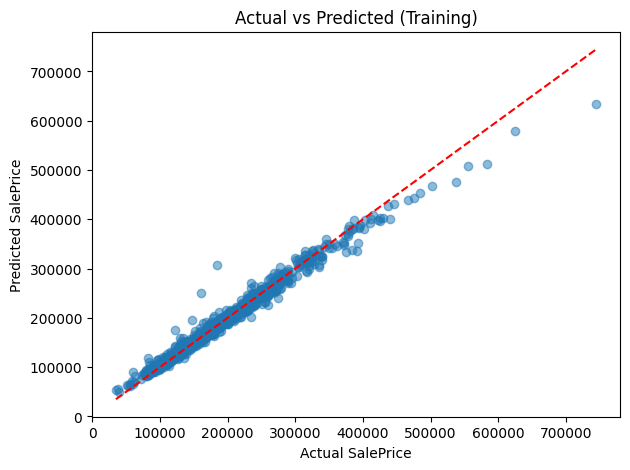

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, full_model.predict(X_train), alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
plt.title("Actual vs Predicted (Training)")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")


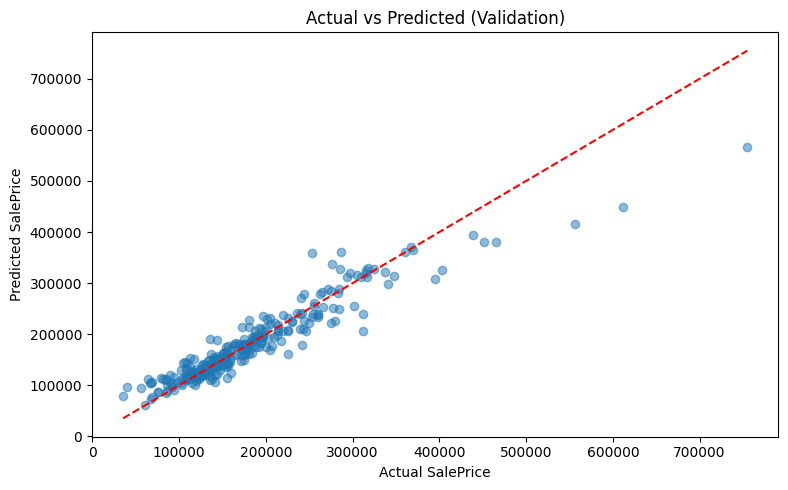

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.title("Actual vs Predicted (Validation)")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")

plt.tight_layout()
plt.show()

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [20]:
svr_features = ['YrSold', 'MoSold', 'LotArea', 'BedroomAbvGr']
svr_features

['YrSold', 'MoSold', 'LotArea', 'BedroomAbvGr']

In [21]:
X_svr = train_data[svr_features]
y_svr = train_data['SalePrice']

In [22]:
X_train_svr, X_val_svr, y_train_svr, y_val_svr = train_test_split(X_svr, y_svr, test_size=0.2, random_state=42)

In [23]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_svr, y_train_svr)

SVR(kernel='linear')

In [24]:
predictions_svr_train = svr_model.predict(X_train_svr)
predictions_svr_train

array([159788.86416945, 158256.05204449, 160530.06141028, ...,
       158883.98085294, 157845.76279519, 147714.38839397])

In [25]:
predictions_svr_val = svr_model.predict(X_val_svr)
predictions_svr_val

array([159406.14242659, 169375.32137845, 160812.06915603, 151528.01276598,
       171382.54206738, 141956.01399854, 178095.19443855, 144361.11475316,
       143749.63047675, 180042.06513534, 154630.11950383, 163970.08292398,
       184221.04683218, 163988.12726901, 159402.97709236, 160893.72282312,
       159275.11387191, 155917.50017653, 159219.39464197, 165514.69323716,
       171259.45486102, 161304.26042233, 159981.87578616, 153163.77365962,
       161640.90457675, 158089.26118431, 161230.27526865, 186925.75671921,
       166060.66647933, 148890.39553723, 157321.52289996, 165615.61742399,
       183905.15610323, 159666.09025083, 172709.23069463, 161902.75149617,
       156640.07166371, 159463.08992658, 176037.88077471, 171172.11458037,
       154575.88108466, 160908.71821866, 163311.59959183, 170896.47147021,
       164079.51009641, 163683.99466345, 158625.14281855, 157610.25301669,
       172664.32344565, 167335.06094847, 156626.63111273, 163180.19072351,
       145226.52646772, 1

In [26]:
train_mse_svr = mean_squared_error(y_train_svr, predictions_svr_train)
print(f"SVR - Training MSE: {train_mse_svr}")

SVR - Training MSE: 5834826317.000901


In [27]:
val_mse_svr = mean_squared_error(y_val_svr, predictions_svr_val)
print(f"SVR - Validation MSE: {val_mse_svr}")

SVR - Validation MSE: 7318387775.084819


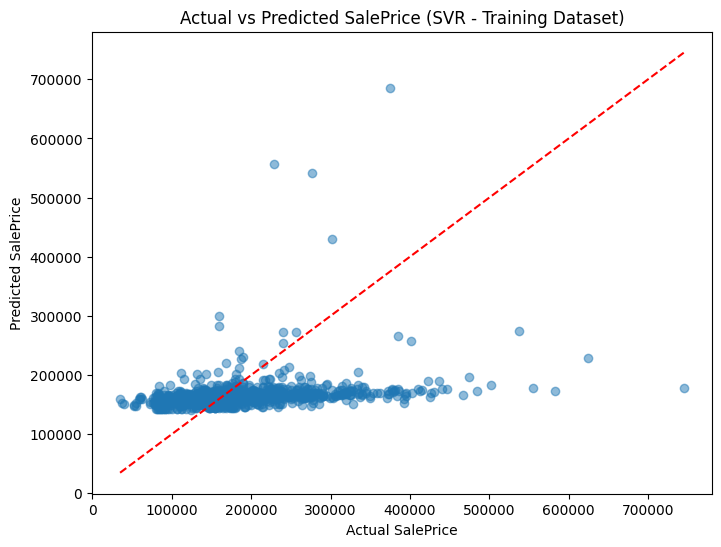

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_svr, predictions_svr_train, alpha=0.5)
plt.plot([min(y_train_svr), max(y_train_svr)], [min(y_train_svr), max(y_train_svr)], '--', color='red')
plt.title("Actual vs Predicted SalePrice (SVR - Training Dataset)")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()

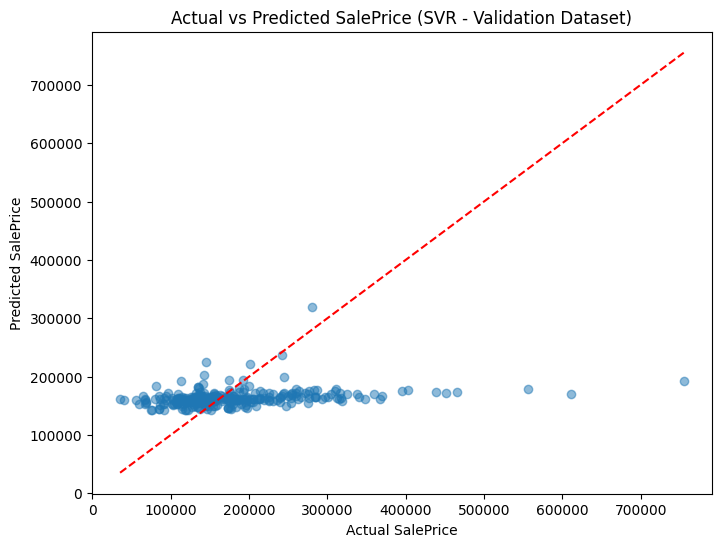

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_val_svr, predictions_svr_val, alpha=0.5)
plt.plot([min(y_val_svr), max(y_val_svr)], [min(y_val_svr), max(y_val_svr)], '--', color='red')
plt.title("Actual vs Predicted SalePrice (SVR - Validation Dataset)")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()

In [30]:
submission_svr_val = pd.DataFrame({'Id': X_val_svr.index, 'ActualSalePrice': y_val_svr, 'PredictedSalePrice': predictions_svr_val})

In [31]:
submission_svr_val

,Id,ActualSalePrice,PredictedSalePrice
892,892,154500,159406.142427
1105,1105,325000,169375.321378
413,413,115000,160812.069156
522,522,159000,151528.012766
1036,1036,315500,171382.542067
...,...,...,...
479,479,89471,153092.535557
1361,1361,260000,179463.110606
802,802,189000,159656.871274
651,651,108000,162012.633016
